Dataset: Spam email classifier or house prices

1. Train Random Forest model

2. Compare F1 score/R^2 with previous models

3. Visualize feature importance

4 .Optioal: Train simple XGBoost model and compare result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv("/content/house-pricedataset2.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
dataset.shape

(20640, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Fill missing values in 'total_bedrooms' with its median
median_bedrooms = dataset['total_bedrooms'].median()
dataset['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Verify no more missing values in 'total_bedrooms'
print(f"Missing values in 'total_bedrooms' after imputation: {dataset['total_bedrooms'].isnull().sum()}\n")

# 2. Apply one-hot encoding to 'ocean_proximity'
dataset_processed = pd.get_dummies(dataset, columns=['ocean_proximity'], drop_first=False)

# 3. Separate features (X) and target variable (y)
X = dataset_processed.drop('median_house_value', axis=1)
y = dataset_processed['median_house_value']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete. Missing values handled, categorical features encoded, and data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Missing values in 'total_bedrooms' after imputation: 0

Data preprocessing complete. Missing values handled, categorical features encoded, and data split into training and testing sets.
X_train shape: (16512, 13)
X_test shape: (4128, 13)
y_train shape: (16512,)
y_test shape: (4128,)


/tmp/ipython-input-3182848752.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Fill missing values in 'total_bedrooms' with its median
median_bedrooms = dataset['total_bedrooms'].median()
dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(median_bedrooms)

# Verify no more missing values in 'total_bedrooms'
print(f"Missing values in 'total_bedrooms' after imputation: {dataset['total_bedrooms'].isnull().sum()}\n")

# 2. Apply one-hot encoding to 'ocean_proximity'
dataset_processed = pd.get_dummies(dataset, columns=['ocean_proximity'], drop_first=False)

# 3. Separate features (X) and target variable (y)
X = dataset_processed.drop('median_house_value', axis=1)
y = dataset_processed['median_house_value']

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete. Missing values handled, categorical features encoded, and data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Missing values in 'total_bedrooms' after imputation: 0

Data preprocessing complete. Missing values handled, categorical features encoded, and data split into training and testing sets.
X_train shape: (16512, 13)
X_test shape: (4128, 13)
y_train shape: (16512,)
y_test shape: (4128,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model with a random state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the R^2 score
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RandomForestRegressor R^2 Score: {r2_rf:.4f}")

RandomForestRegressor R^2 Score: 0.8169


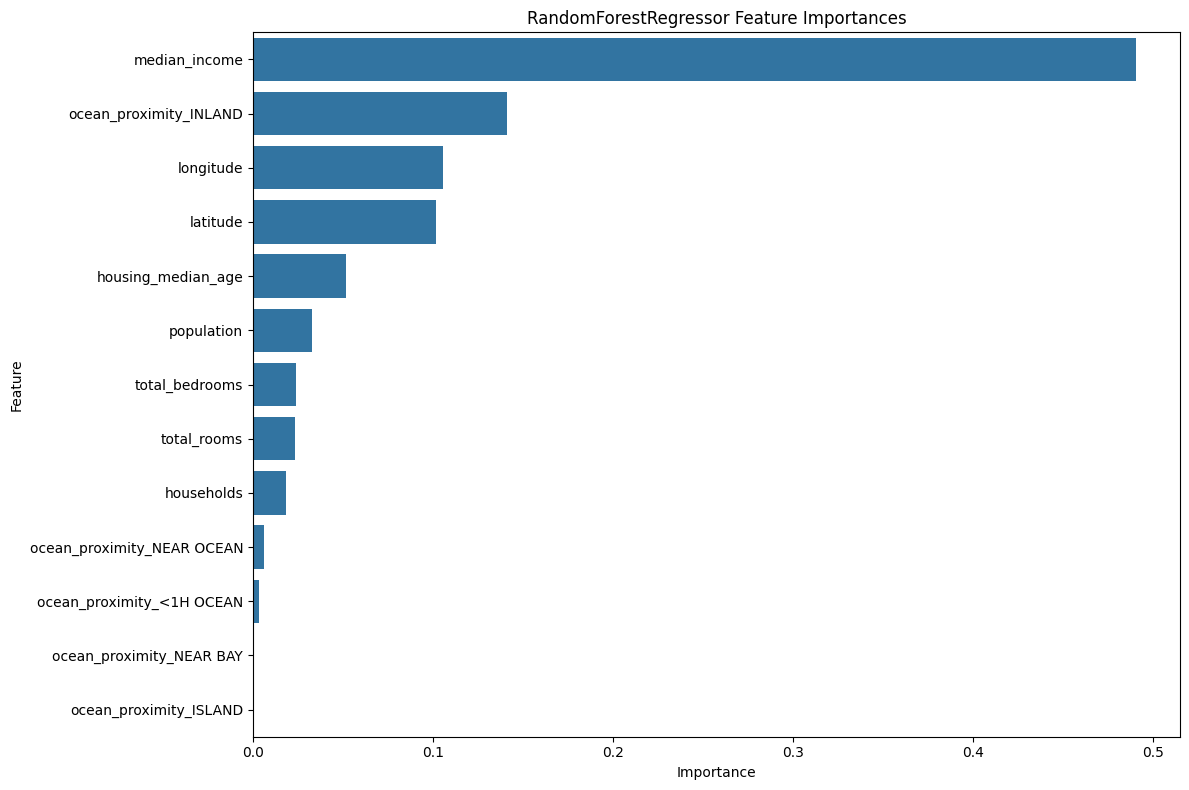

Feature importances visualized successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the trained RandomForestRegressor model
feature_importances = rf_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for better visualization and sorting
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('RandomForestRegressor Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature importances visualized successfully.")

## Train XGBoost Regressor

### Subtask:
Initialize and train an XGBoostRegressor model on the preprocessed training data (`X_train`, `y_train`). The target variable is 'median_house_value'.


## Train XGBoost Regressor

### Subtask:
Initialize and train an XGBoostRegressor model on the preprocessed training data (`X_train`, `y_train`). The target variable is 'median_house_value'.


**Reasoning**:
I need to import the XGBRegressor class, instantiate it, and then train it using the preprocessed training data (X_train, y_train) as specified by the subtask.



In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoostRegressor model with a random state for reproducibility
xgb_model = XGBRegressor(random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

print("XGBoostRegressor model trained successfully.")

XGBoostRegressor model trained successfully.


In [ ]:
from xgboost import XGBRegressor

# Sanitize column names for XGBoost compatibility
X_train.columns = X_train.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False).str.replace('<', '_', regex=False)
X_test.columns = X_test.columns.str.replace('[', '_', regex=False).str.replace(']', '_', regex=False).str.replace('<', '_', regex=False)

# Initialize the XGBoostRegressor model with a random state for reproducibility
xgb_model = XGBRegressor(random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

print("XGBoostRegressor model trained successfully.")

XGBoostRegressor model trained successfully.


## Evaluate XGBoost Regressor

### Subtask:
Evaluate the trained XGBoostRegressor model on the test set (`X_test`, `y_test`) and report its R^2 score.

**Reasoning**:
Now that the XGBoostRegressor model is trained, I need to evaluate its performance on the test set. I will use the `predict` method to get predictions on `X_test` and then calculate the R^2 score using `r2_score` from `sklearn.metrics`.



In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the R^2 score
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoostRegressor R^2 Score: {r2_xgb:.4f}")

XGBoostRegressor R^2 Score: 0.8270


## Compare Model Performance

### Subtask:
Compare the R^2 scores of the RandomForestRegressor and XGBoostRegressor models and summarize their performance.

**Reasoning**:
Both the RandomForestRegressor and XGBoostRegressor models have been trained and evaluated, and their R^2 scores are available. The final step is to compare these scores and summarize the models' performance.



In [ ]:
print(f"\n--- Model Performance Comparison ---")
print(f"RandomForestRegressor R^2 Score: {r2_rf:.4f}")
print(f"XGBoostRegressor R^2 Score: {r2_xgb:.4f}")

if r2_xgb > r2_rf:
    print("XGBoostRegressor performed slightly better than RandomForestRegressor on this dataset.")
elif r2_rf > r2_xgb:
    print("RandomForestRegressor performed slightly better than XGBoostRegressor on this dataset.")
else:
    print("Both models performed similarly on this dataset.")

print("Model comparison complete.")


--- Model Performance Comparison ---
RandomForestRegressor R^2 Score: 0.8169
XGBoostRegressor R^2 Score: 0.8270
XGBoostRegressor performed slightly better than RandomForestRegressor on this dataset.
Model comparison complete.
